In [1]:
import os
import json

import numpy as np
import pandas as pd
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import FETCH_LOAD_DATAS
from ACP_functions import display_corr_circle, display_factorial_planes, display_scree_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
dict_data, list_data = FETCH_LOAD_DATAS.load_olist_data()

In [3]:
SEED = 49

In [4]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)

plt.rcParams['figure.figsize'] = [10, 8]

In [5]:
IMAGES_PATH = Path() / "img" / "exploration"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
ID_FIG = 0

def save_fig(fig_title, resolution=300):
    fig_id = str(globals()['ID_FIG'])
    path = IMAGES_PATH / f"exploration - {fig_id} - {fig_title}.png"
    globals()['ID_FIG']+=1
    plt.savefig(path, format='png', dpi=resolution)

In [6]:
DICT_PATH = Path() / "dictionnaries"
DICT_PATH.mkdir(parents=True, exist_ok=True)

def save_dict(dictionnary, dict_file_name):
    path_file = DICT_PATH / f"{dict_file_name}.json"
    with open(path_file, "w") as outfile:
        json.dump(dictionnary, outfile)

In [7]:
for value in dict_data.values():
    display(value)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
olist_customers_dataset,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
olist_geolocation_dataset,,,,,
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
olist_orders_dataset,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
olist_order_items_dataset,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


,order_id,payment_sequential,payment_type,payment_installments,payment_value
olist_order_payments_dataset,,,,,
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
olist_order_reviews_dataset,,,,,,,
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
olist_products_dataset,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
olist_sellers_dataset,,,,
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP


,product_category_name,product_category_name_english
product_category_name_translation,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony


In [8]:
list_data

['olist_customers_dataset',
 'olist_geolocation_dataset',
 'olist_orders_dataset',
 'olist_order_items_dataset',
 'olist_order_payments_dataset',
 'olist_order_reviews_dataset',
 'olist_products_dataset',
 'olist_sellers_dataset',
 'product_category_name_translation']

In [9]:
olist_customers_dataset = dict_data["olist_customers_dataset"]
olist_geolocation_dataset = dict_data["olist_geolocation_dataset"]
olist_orders_dataset = dict_data["olist_orders_dataset"]
olist_order_items_dataset = dict_data["olist_order_items_dataset"]
olist_order_payments_dataset = dict_data["olist_order_payments_dataset"]
olist_order_reviews_dataset = dict_data["olist_order_reviews_dataset"]
olist_products_dataset = dict_data["olist_products_dataset"]
olist_sellers_dataset = dict_data["olist_sellers_dataset"]
product_category_name_translation = dict_data["product_category_name_translation"]

In [10]:
for dataset in list_data:
    globals()[dataset].index.name=""

# Exploration des datasets

Nous allons commencer par explorer les variables importantes des datasets mis à notre disposition par Olist pour nous faire une idée des variables pertinentes à conserver et à transformer pour les besoins de notre étude.

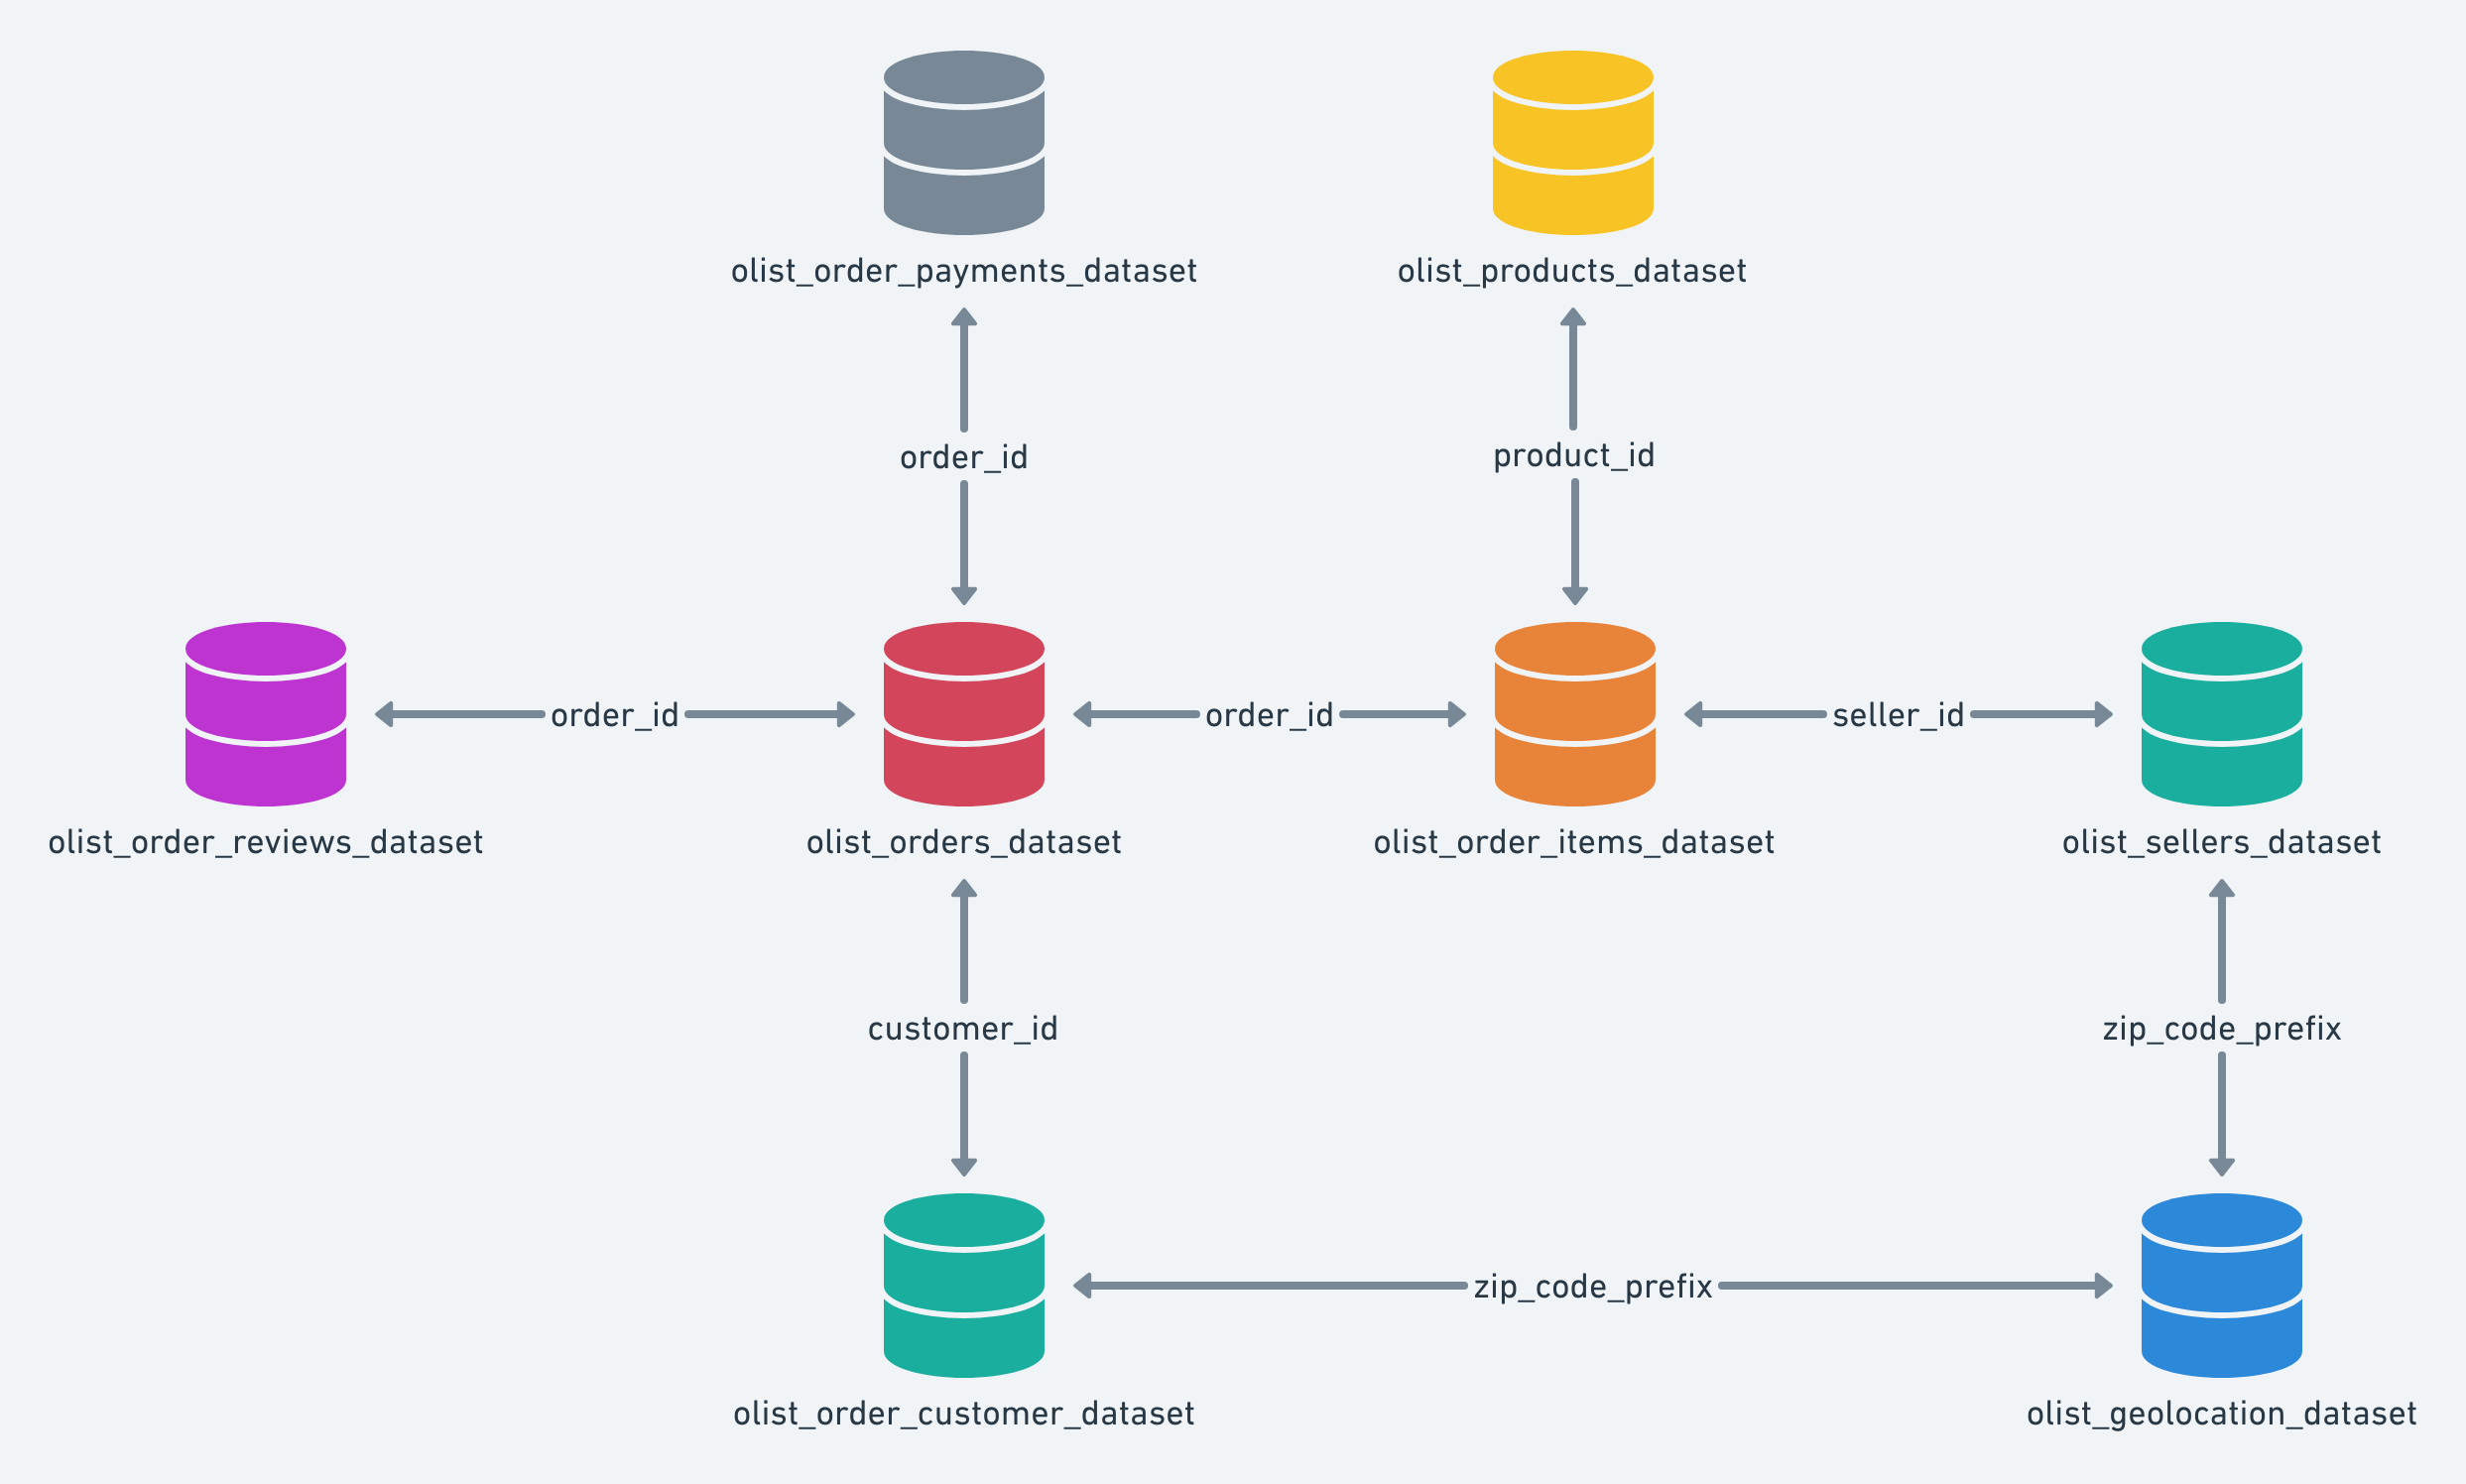

## Customers

Ce dataset établi la correspondance entre chaque *identifiant_client* (généré à chaque commande) et un *identifiant_compte_client* associé aux informations de localisation du lieu de résidence (province, code-postal, ville).

Ici la correspondance **customer_id/customer_unique_id** est particulièrement intéressante car elle nous permettra de faire la correspondance entre une commande et un client, et ainsi définir un comportement qui lui est propre (nombre de commandes, montant total dépensé, fréquence d'achat etc.)

In [11]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
olist_customers_dataset['customer_unique_id'].nunique()

96096

In [13]:
olist_customers_dataset.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [14]:
olist_customers_dataset.isna().mean()

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

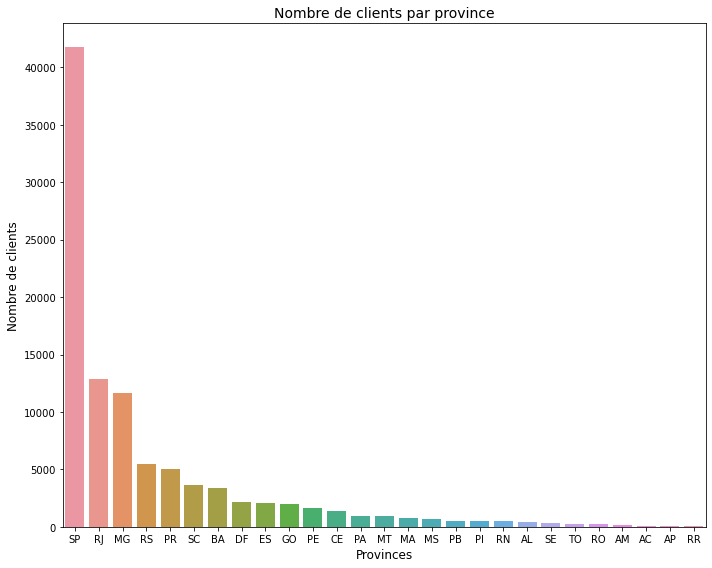

In [15]:
sns.barplot(x=olist_customers_dataset["customer_state"].value_counts().index, y=olist_customers_dataset["customer_state"].value_counts(), data=olist_customers_dataset)
plt.xlabel("Provinces", size=12)
plt.ylabel("Nombre de clients", size=12)
plt.title("Nombre de clients par province", size=14)
plt.tight_layout()
save_fig("Nombre de clients par province")
plt.show()

Nous observons que la province de **Sao Paulo** est très représentée.
C'est en effet la province la plus riche du Brésil, et qui concentre environ 1/3 du PIB du pays, donc il paraît normal que dans un pays émergent, une grande partie des cliens d'un site de vente à distance proviennent de cette région.

Afin de réaliser les manipulations sur nos DataFrames plus rapidement, nous pouvons d'ores-et-déjà définir un dictionnaire de correspondance entre **customer_id** et **customer_unique_id** :

In [16]:
# dict_customer_unique = dict()
# for customer in olist_customers_dataset['customer_id'].unique():
#     dict_customer_unique[customer] = olist_customers_dataset[olist_customers_dataset['customer_id']==customer]['customer_unique_id'].values[0]

# save_dict(dict_customer_unique, 'dict_customer_unique')

## Produits

Ce dataset fait la correspondance entre l'identifiant d'un produit et sa catégorie, et fournit des détails divers comme ses dimensions, son poids, le nombre de photos d'illustration.

In [17]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [18]:
olist_products_dataset.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [19]:
olist_products_dataset.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [20]:
olist_products_dataset.isna().mean()

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

Il y a peu de valeurs manquantes (<2%) dans la variable **product_category_name**.

### Traduction des catégories de produit du portugais vers l'anglais

In [21]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [22]:
dict_trad_cat = {port:product_category_name_translation[product_category_name_translation['product_category_name']==port]['product_category_name_english'].values[0] for port in product_category_name_translation['product_category_name'].unique()}
save_dict(dict_trad_cat, 'dict_trad_cat')

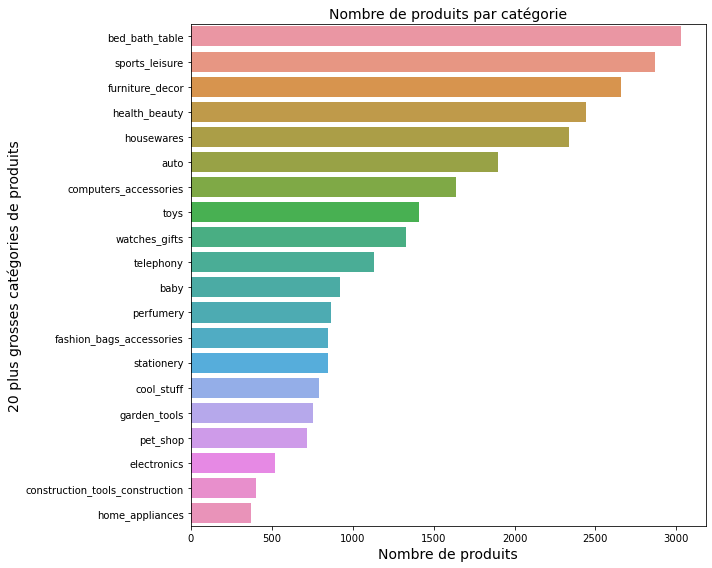

In [23]:
sns.countplot(y=olist_products_dataset['product_category_name'].map(dict_trad_cat), order=olist_products_dataset['product_category_name'].map(dict_trad_cat).value_counts().index[:20])
plt.xlabel("Nombre de produits", size=14)
plt.ylabel("20 plus grosses catégories de produits", size=14)
plt.title("Nombre de produits par catégorie", size=14)
plt.tight_layout()
save_fig("Nombre de produits par catégorie")
plt.show()

In [24]:
product_category_name_translation.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Nous observons ici qu'il n'y a pas le même nombre de catégories dans les 2 datasets précédents.
Afin de pouvoir traduire toutes les catégories de produits, nous allons mettre le premier dataset descriptif des produits au diapason avec le deuxième:

In [25]:
np.setdiff1d(olist_products_dataset['product_category_name'].unique(), product_category_name_translation['product_category_name'].unique(), assume_unique=True)

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

In [26]:
product_category_name_translation['product_category_name_english'][product_category_name_translation['product_category_name_english'].str.contains('comp')]


1     computers_accessories
53                computers
Name: product_category_name_english, dtype: object

In [27]:
product_category_name_translation[product_category_name_translation['product_category_name_english']=='computers']['product_category_name']


53    pcs
Name: product_category_name, dtype: object

In [28]:
dict_replace_cat_port = {'portateis_cozinha_e_preparadores_de_alimentos':'la_cuisine',
                         'pc_gamer':'pcs'}
olist_products_dataset['product_category_name'].replace(to_replace=dict_replace_cat_port, inplace=True)

In [29]:
np.setdiff1d(olist_products_dataset['product_category_name'].unique(), product_category_name_translation['product_category_name'].unique(), assume_unique=True)

array([nan], dtype=object)

In [30]:
olist_products_dataset['product_category_name'].fillna('unknown', inplace=True)

## Composition des commandes

Ce dataset est primordial pour notre travail car il nous permet de faire la correspondance entre :

   1. une commande passée
   2. les produits qui la composent
   3. le prix de chaque produit et les frais de livraion de la commande qui nous donne le montant total de la commande

In [31]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [32]:
olist_order_items_dataset.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [33]:
olist_order_items_dataset.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [34]:
olist_order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Informations statistiques sur le montant des commandes (hors-frais de livraison)
----------------------------------------
moyenne:
 137.75
médiane:
 86.9
mode:
 [59.9]
variance:
 44370.93
écart-type:
 210.64
skwewness:
 9.73
kurtosis:
 266.07
minimum:
 0.85
maximum:
 13440.0


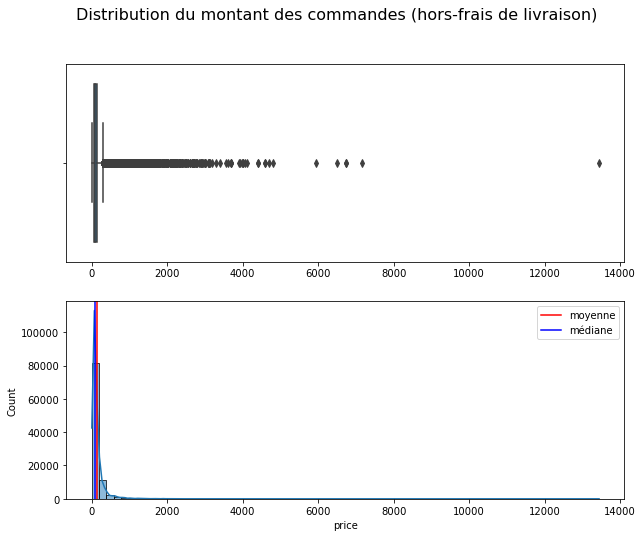

In [35]:
subset=olist_order_items_dataset.groupby(by='order_id').sum()['price']
print("Informations statistiques sur le montant des commandes (hors-frais de livraison)")
print('--'*20)
print("moyenne:\n",np.round(subset.mean(),2))
print("médiane:\n",np.round(subset.median(),2))
print("mode:\n",np.round(subset.mode().values,2))
print("variance:\n",np.round(subset.var(ddof=0),2))
print("écart-type:\n",np.round(subset.std(ddof=0),2))
print("skwewness:\n",np.round(subset.skew(),2))
print("kurtosis:\n",np.round(subset.kurtosis(),2))
print("minimum:\n",np.round(subset.min(),2))
print("maximum:\n",np.round(subset.max(),2))
fig = plt.figure()
plt.subplot(2,1,1)
ax1 = sns.boxplot(x=subset)
ax1.set(xlabel=None)
plt.subplot(2,1,2)
ax2 = sns.histplot(x=subset, kde=True, bins=70)
plt.axvline(x=subset.mean(), color='r', label='moyenne')
plt.axvline(x=subset.median(), color='b', label='médiane')
plt.suptitle("Distribution du montant des commandes (hors-frais de livraison)", fontsize=16)
plt.legend();

On observe que la distribution des montants des commandes (hors-frais de livraison) suit une **loi exponentielle**.

## Suivi des commandes

Ce dataset nous permet de connaître la correspondance entre :

   1. l'identifiant d'une commande
   2. l'identifiant du client associé (et non celui du compte client unique)
   3. l'état de la commande
   4. Diverses dates caractéristiques (date d'achat, date de livraison estimée, date de livraison effective...)

Nous pouvons dès lors faire la correspondance entre chaque commande et chaque client unique.

In [36]:
%store -r dict_order_customer_unique
# dict_order_customer_unique = dict()
# for order in olist_orders_dataset['order_id'].unique():
#     dict_order_customer_unique[order] = dict_customer_unique[olist_orders_dataset[olist_orders_dataset['order_id']==order]['customer_id'].values[0]]

# save_dict(dict_order_customer_unique, "dict_order_customer_unique")

In [37]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
olist_orders_dataset.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [39]:
olist_orders_dataset.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

In [40]:
olist_orders_dataset['order_status'].value_counts(normalize=True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

In [41]:
olist_orders_dataset[olist_orders_dataset['order_status']=='delivered'].isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000145
order_delivered_carrier_date     0.000021
order_delivered_customer_date    0.000083
order_estimated_delivery_date    0.000000
dtype: float64

Il y a significativement moins de valeurs manquantes dans l'ensemble des commandes qui nous intéressent : celles qui ont été livrées.

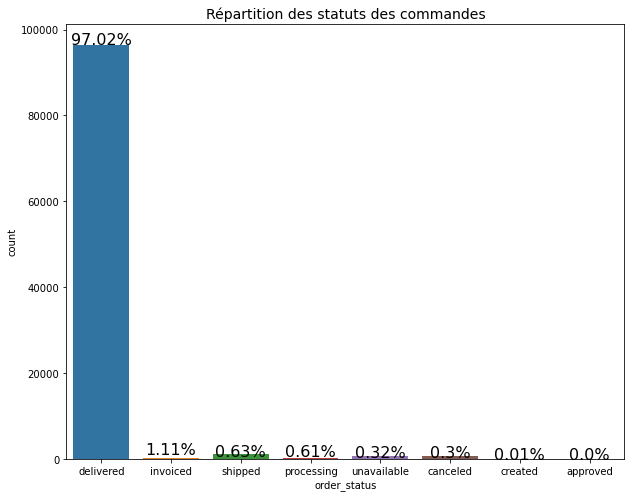

In [42]:
sns.countplot(x=olist_orders_dataset['order_status'])
for index, data in enumerate(olist_orders_dataset["order_status"].sort_values(ascending=False).value_counts().values):
    plt.text(x=index, y=data, s=f"{round(100*data/olist_orders_dataset.shape[0],2)}%", horizontalalignment="center", fontsize=16)
plt.title("Répartition des statuts des commandes", fontsize=14)
save_fig("Répartition des statuts des commandes")

In [43]:
date_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date']

olist_orders_dataset[date_columns] = olist_orders_dataset[date_columns].apply(pd.to_datetime)

Pour la suite de notre étude nous supprimons les commandes **indisponibles** ou **annulées**.

In [44]:
olist_orders_dataset.drop(index= olist_orders_dataset[olist_orders_dataset['order_status']=='canceled'].index, inplace=True)
olist_orders_dataset.drop(index= olist_orders_dataset[olist_orders_dataset['order_status']=='unavailable'].index, inplace=True)

In [45]:
olist_orders_dataset['order_purchase_timestamp'].min(), olist_orders_dataset['order_purchase_timestamp'].max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-09-03 09:06:57'))

In [46]:
#olist_orders_dataset = olist_orders_dataset[olist_orders_dataset['order_status']=='delivered']

Les données dont nous disposons nous disposons retrace un historique d'observation des commandes d'une durée de **2 ans** à compter du **4 Septembre 2016**.

## Règlement des commandes

Ce dataset nous indique pour chaque commande le nombre de moyens de réglement utilisés par le client, les moyens en question, l'étalement du paiement choisi (nombre d'échéances) ainsi que le montant réglé à chaque échéance et/ou avec chaque moyen de règlement.

In [47]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
,,,,,
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [48]:
olist_order_payments_dataset.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [49]:
olist_order_payments_dataset.isna().mean()

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

Nous observons qu'en moyenne les clients utilisent en moyenne **1 seul moyen de paiment** pour régler leurs commandes et que le moyen de paiment le plus utilisé est la **carte de crédit**, ainsi qu'ils étalent en moyenne le règlement de leurs commandes sur **3 échéances**.

In [50]:
olist_order_payments_dataset[olist_order_payments_dataset["order_id"]=='fa65dad1b0e818e3ccc5cb0e39231352']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
,,,,,
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02


Informations statistiques sur le montant total des commandes
----------------------------------------
moyenne:
 160.99
médiane:
 105.29
mode:
 [77.57]
variance:
 49261.86
écart-type:
 221.95
skwewness:
 9.15
kurtosis:
 233.41
minimum:
 0.0
maximum:
 13664.08


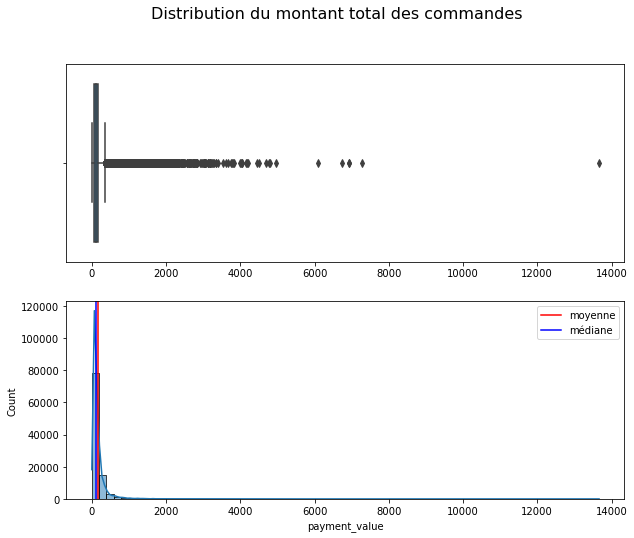

In [51]:
subset=olist_order_payments_dataset.groupby(by='order_id').sum()['payment_value']
print("Informations statistiques sur le montant total des commandes")
print('--'*20)
print("moyenne:\n",np.round(subset.mean(),2))
print("médiane:\n",np.round(subset.median(),2))
print("mode:\n",np.round(subset.mode().values,2))
print("variance:\n",np.round(subset.var(ddof=0),2))
print("écart-type:\n",np.round(subset.std(ddof=0),2))
print("skwewness:\n",np.round(subset.skew(),2))
print("kurtosis:\n",np.round(subset.kurtosis(),2))
print("minimum:\n",np.round(subset.min(),2))
print("maximum:\n",np.round(subset.max(),2))
fig = plt.figure()
plt.subplot(2,1,1)
ax1 = sns.boxplot(x=subset)
ax1.set(xlabel=None)
plt.subplot(2,1,2)
ax2 = sns.histplot(x=subset, kde=True, bins=70)
plt.axvline(x=subset.mean(), color='r', label='moyenne')
plt.axvline(x=subset.median(), color='b', label='médiane')
plt.suptitle("Distribution du montant total des commandes", fontsize=16)
plt.legend();

Sans surprise, le montant total des commandes suit une **loi exponentielle**.

## Appréciation des commandes

Ce dataset nous fournit pour chaque commande, l'unique ou les multiples appréciations laissées par les clients (note sur 5, commentaire textuel le cas échéant) ainsi que la date de création de l'appréciation et de la réponse à l'enquête de satisfaction.

In [52]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
,,,,,,,
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [53]:
olist_order_reviews_dataset.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [54]:
olist_order_reviews_dataset.isna().mean()

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

Il existe des doublons dans les colonnes **review_id** et **order_id**.

Le titre de commentaire (**"Je recommande"**) et le commentaire (**"Très bien"**) qui reviennent le plus souvent sont positifs, mais seul la moyenne des notations (**4**) nous permet d'estimer que les clients sont dans l'ensemble satisfaits de leur expérience avec **Olist**.

Plus de la moitié des appréciations ne comportent pas de commentaires, seulement une appréciation sur 1 comporte un titre.

In [55]:
olist_order_reviews_dataset[olist_order_reviews_dataset.duplicated(subset='review_id', keep='first')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
,,,,,,,
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47


In [56]:
olist_order_reviews_dataset[olist_order_reviews_dataset.duplicated(subset='order_id', keep='first')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
,,,,,,,
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47


Étant donné la faible proportion que les doublons représentent, nous décidons les supprimer.

In [57]:
len(olist_order_reviews_dataset[~olist_order_reviews_dataset.duplicated(subset='review_id', keep='first')][~olist_order_reviews_dataset[~olist_order_reviews_dataset.duplicated(subset='review_id', keep='first')].duplicated(subset='order_id', keep='first')])/len(olist_order_reviews_dataset)

0.9893473353220995

In [58]:
olist_order_reviews_dataset = olist_order_reviews_dataset[~olist_order_reviews_dataset.duplicated(subset='review_id', keep='first')][~olist_order_reviews_dataset[~olist_order_reviews_dataset.duplicated(subset='review_id', keep='first')].duplicated(subset='order_id', keep='first')]

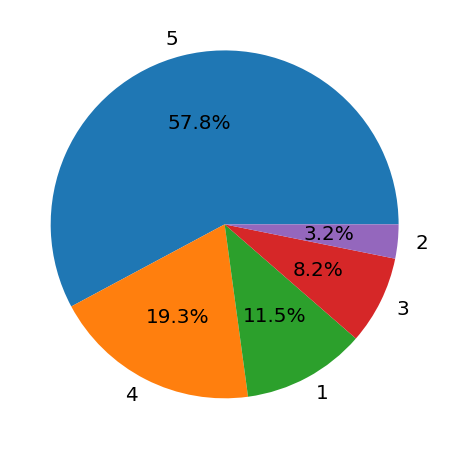

In [59]:
plt.pie(olist_order_reviews_dataset['review_score'].value_counts(), 
        labels=olist_order_reviews_dataset['review_score'].value_counts().index,
        textprops=dict(fontsize=20),
        autopct="%1.1f%%"
       )
save_fig("Répartition des notes de satisfaction")

## Géolocalisation et informations vendeurs

Nous ne passerons pas en revue ces 2 datasets car ils ne nous seront pas utiles dans le cadre de notre étude.

# Croisement des datasets

Avant de chercher à combiner nos datasets pour avoir une base de données représentative des comportements des clients qui nous servent de point de départ pour réaliser notre segmentation, il y a un certain nombre de questions auxquelles nous pouvons d'ores-et-déjà chercher à répondre :

### Lien présence message/satisfaction (note)

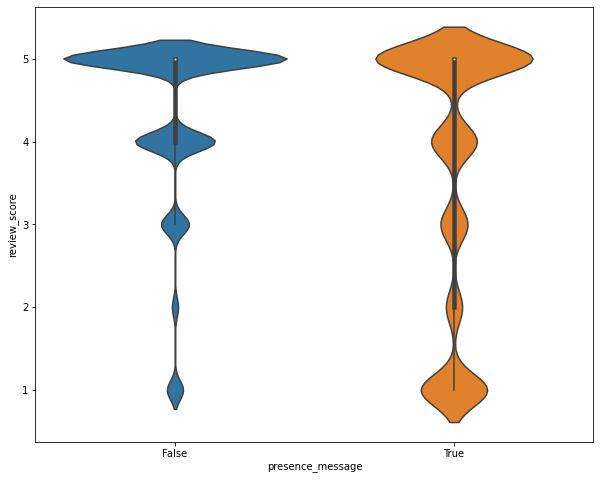

In [60]:
olist_order_reviews_dataset['presence_message'] = olist_order_reviews_dataset['review_comment_message'].apply(lambda x: True if isinstance(x,str) else False)
sns.violinplot(data=olist_order_reviews_dataset[['presence_message', 'review_score']], 
               x='presence_message', 
               y='review_score', 
              scale='count')
save_fig("Notes de satisfaction en fonction de la présence de message")

**Conclusion :**

Les clients qui laissent des commentaires ont tendance à être soit très satisfait soit très insatisfait de leur commande.

Les clients qui ne laissent pas de commentaires sont plutôt très satisfaits.

### Chiffre d'affaire par catégorie de produit

In [61]:
ca_by_cat = olist_order_items_dataset[['order_id', 'product_id', 'price']]
ca_by_cat = ca_by_cat.merge(olist_products_dataset[['product_category_name', 'product_id']], on='product_id')
ca_by_cat['product_category_name'].replace(dict_trad_cat, inplace=True)

In [62]:
ca_by_cat = ca_by_cat.groupby(by='product_category_name').sum()[['price']].sort_values(by='price', ascending=False)
ca_by_cat.reset_index(inplace=True)

In [63]:
ca_by_cat['proportion'] = ca_by_cat['price']/ca_by_cat['price'].sum()
ca_by_cat['cumul_proportion'] = ca_by_cat['proportion']
for i in range(1, ca_by_cat.shape[0]):
    ca_by_cat.iloc[i, ca_by_cat.columns.get_loc('cumul_proportion')] = ca_by_cat.iloc[i-1, ca_by_cat.columns.get_loc('cumul_proportion')]+ca_by_cat.iloc[i, ca_by_cat.columns.get_loc('proportion')]

In [64]:
ca_by_cat

,product_category_name,price,proportion,cumul_proportion
0,health_beauty,1258681.34,0.092607,0.092607
1,watches_gifts,1205005.68,0.088658,0.181265
2,bed_bath_table,1036988.68,0.076296,0.257561
3,sports_leisure,988048.97,0.072695,0.330256
4,computers_accessories,911954.32,0.067097,0.397353
5,furniture_decor,729762.49,0.053692,0.451045
6,cool_stuff,635290.85,0.046741,0.497786
7,housewares,632248.66,0.046517,0.544304
8,auto,592720.11,0.043609,0.587913
9,garden_tools,485256.46,0.035703,0.623615


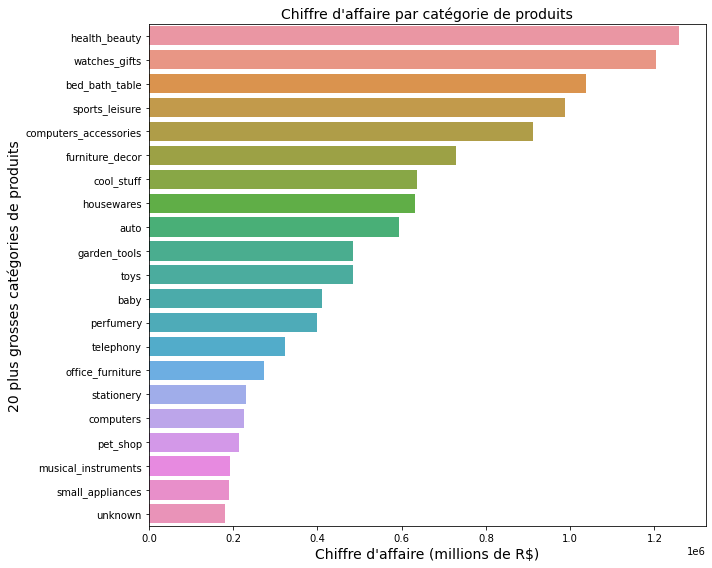

In [65]:
sns.barplot(data=ca_by_cat.loc[:20,:], y='product_category_name', x='price')
plt.xlabel("Chiffre d'affaire (millions de R$)", size=14)
plt.ylabel("20 plus grosses catégories de produits", size=14)
plt.title("Chiffre d'affaire par catégorie de produits", size=14)
plt.tight_layout()
save_fig("Chiffre d'affaire par catégorie de produits")
plt.show()

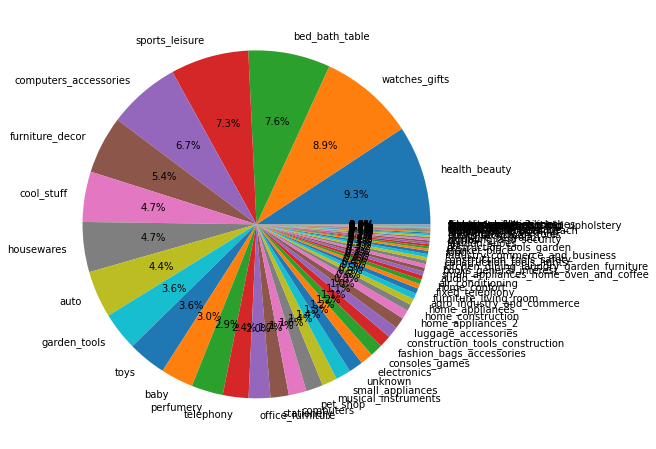

In [66]:
plt.pie(ca_by_cat['price'], labels=ca_by_cat['product_category_name'], autopct="%1.1f%%")
save_fig("Répartition du chiffre d'affaire entre les catégories de produit")

**Conclusion:**

Les **7 catégories** rapportant le plus gros chiffre d'affaire concentrent à elles seules **50% du chiffre d'affaire** total.

### Fréquences d'achat des clients

In [67]:
%store -r dict_customer_unique

recurrent_customers = olist_orders_dataset[['order_id','customer_id']]
recurrent_customers['customer_unique_id'] = recurrent_customers['customer_id'].map(dict_customer_unique)

In [68]:
List_rec_customers = list(recurrent_customers['customer_unique_id'].value_counts()[recurrent_customers['customer_unique_id'].value_counts()>1].index)
len(List_rec_customers)

2888

In [69]:
recurrent_customers['recurrent_customers'] = recurrent_customers['customer_unique_id'].apply(lambda x: x in List_rec_customers)

In [70]:
recurrent_customers['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
8d5d92f61be08c1c7b0cdcba36a77744     1
565283fe12fa1a894ef451c4bfb391ed     1
c6f8a0976d97dc94811f4e2beafe7046     1
8e88ad507bc0ce64d339830e4ac84fff     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 94990, dtype: int64

In [71]:
recurrent_customers['customer_unique_id'].value_counts().value_counts(normalize=True)

1     0.969597
2     0.027919
3     0.001979
4     0.000305
5     0.000095
6     0.000053
7     0.000032
16    0.000011
9     0.000011
Name: customer_unique_id, dtype: float64

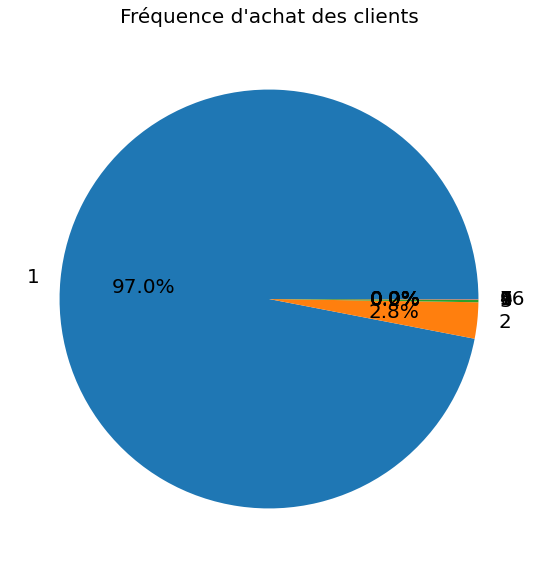

In [72]:
plt.pie(recurrent_customers['customer_unique_id'].value_counts().value_counts(), 
        labels=recurrent_customers['customer_unique_id'].value_counts().value_counts().index, 
        textprops=dict(fontsize=20),
        autopct="%1.1f%%"
       );
# plt.legend(sorted(recurrent_customers['customer_unique_id'].value_counts().value_counts().index), 
#            loc="upper right", fontsize=14, fancybox=True, shadow=True)
plt.suptitle("Fréquence d'achat des clients", fontsize=20)
plt.tight_layout()
save_fig("Fréquence d'achat des clients")
plt.show()

**Conclusion :**

La très grande majorité des clients (**96.6 %**) n'ont commandé qu'**une seule fois** sur la période observée.

### Proportion de clients récurrents

In [73]:
freq_by_cat = olist_order_items_dataset[['order_id','product_id']]
freq_by_cat['customer_unique_id'] = freq_by_cat['order_id'].map(dict_order_customer_unique)
freq_by_cat = freq_by_cat.merge(olist_products_dataset[['product_id','product_category_name']], on='product_id')
freq_by_cat['product_category_name'] = freq_by_cat['product_category_name'].map(dict_trad_cat)
freq_by_cat['product_category_name'].fillna('unknown', inplace=True)
freq_by_cat['recurrent_customers'] = freq_by_cat['customer_unique_id'].apply(lambda x: x in List_rec_customers)
freq_by_cat

,order_id,product_id,customer_unique_id,product_category_name,recurrent_customers
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,871766c5855e863f6eccc05f988b23cb,cool_stuff,False
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,0fb8e3eab2d3e79d92bb3fffbb97f188,cool_stuff,False
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,3419052c8c6b45daf79c1e426f9e9bcb,cool_stuff,False
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,e7c828d22c0682c1565252deefbe334d,cool_stuff,False
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,0bb98ba72dcc08e95f9d8cc434e9a2cc,cool_stuff,False
...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,a1c2e4b4c1b29e41684ebdf3cc6538f8,garden_tools,False
112646,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,4e15fee963523774998876e3624952f4,furniture_decor,True
112647,fff7c4452f050315db1b3f24d9df5fcd,dd469c03ad67e201bc2179ef077dcd48,c86ab5ff2bac777c4e770a383feca4eb,watches_gifts,False
112648,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,2a3ab9bf9639491997586882c502540a,sports_leisure,False


In [74]:
df_nb_customers_by_cat = freq_by_cat.groupby(by=['product_category_name']).agg({'customer_unique_id':'nunique'})
df_nb_customers_by_cat

,customer_unique_id
product_category_name,
agro_industry_and_commerce,181
air_conditioning,251
art,202
arts_and_craftmanship,21
audio,349
auto,3852
baby,2858
bed_bath_table,9145
books_general_interest,506


In [75]:
df_nb_rec_customers_by_cat = freq_by_cat.groupby(by=['product_category_name']).agg({'recurrent_customers':'sum'})
df_nb_rec_customers_by_cat

,recurrent_customers
product_category_name,
agro_industry_and_commerce,9
air_conditioning,21
art,8
arts_and_craftmanship,5
audio,17
auto,190
baby,145
bed_bath_table,1105
books_general_interest,24


In [76]:
df_prop_rec_customers_by_cat = pd.DataFrame(index=df_nb_rec_customers_by_cat.index, 
                                            columns=["recurrent_customers_proportion_by_cat"],
                                            data=df_nb_rec_customers_by_cat['recurrent_customers']/df_nb_customers_by_cat['customer_unique_id']
                                           ).sort_values(by="recurrent_customers_proportion_by_cat", ascending=False)
df_prop_rec_customers_by_cat

,recurrent_customers_proportion_by_cat
product_category_name,
diapers_and_hygiene,0.384615
arts_and_craftmanship,0.238095
fashio_female_clothing,0.205128
home_appliances,0.193457
furniture_bedroom,0.164835
drinks,0.150685
fashion_bags_accessories,0.144605
furniture_decor,0.128225
fashion_male_clothing,0.127273


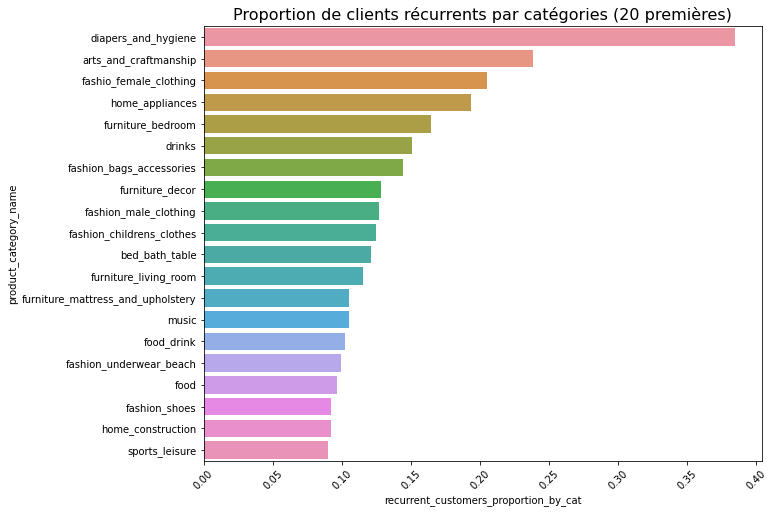

In [77]:
sns.barplot(y=df_prop_rec_customers_by_cat.iloc[:20].index,
            x=df_prop_rec_customers_by_cat.iloc[:20]['recurrent_customers_proportion_by_cat']
           )
plt.title("Proportion de clients récurrents par catégories (20 premières)", fontsize=16)
save_fig("Proportion de clients récurrents par catégories (20 premières)")
plt.xticks(rotation=45);

### Nombre de catégories différentes achetées par les clients

In [78]:
nb_cat_by_customers = freq_by_cat[['customer_unique_id', 'product_category_name']].groupby(by="customer_unique_id").agg({'product_category_name':'nunique'}).value_counts(normalize=True)
nb_cat_by_customers

product_category_name
1                        0.975613
2                        0.022888
3                        0.001300
4                        0.000136
5                        0.000063
dtype: float64

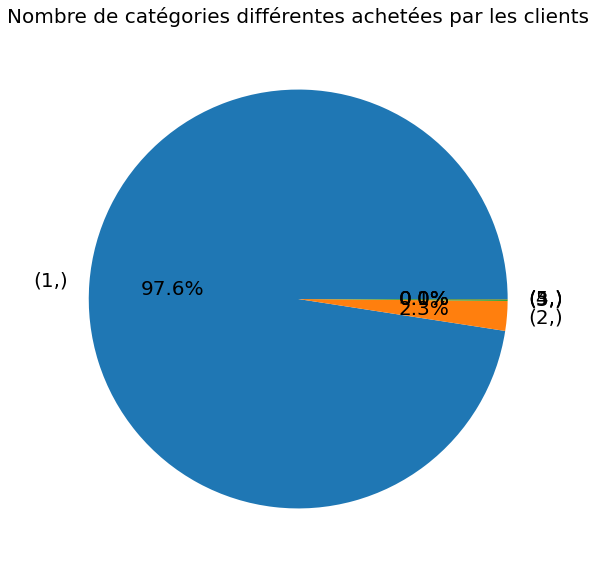

In [79]:
plt.pie(nb_cat_by_customers, 
        labels=nb_cat_by_customers.index, 
        textprops=dict(fontsize=20),
        autopct="%1.1f%%"
       );
# plt.legend(sorted(recurrent_customers['customer_unique_id'].value_counts().value_counts().index), 
#            loc="upper right", fontsize=14, fancybox=True, shadow=True)
plt.suptitle("Nombre de catégories différentes achetées par les clients", fontsize=20)
plt.tight_layout()
#save_fig("Nombre de catégories différentes achetées par les clients")
plt.show()

> La grande majorité des clients réccurents ne commandent que **une ou deux** catégories de produits (**99.9%**).

In [80]:
for dataset in list_data:
    globals()[dataset].to_csv((os.path.join('datasets','exploration', dataset)+'.csv'), index=False)